# Escolha de DJ

### Elisa Malzoni e Bruna Kimura
---------------------------------------

In [2]:
%matplotlib inline
import sys
sys.path.append('..')

from random import choice
from itertools import permutations

import pandas as pd
import networkx as nx

import socnet as sn
import numpy as np
from scipy.stats import norm, linregress
from scipy.optimize import minimize
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
import math

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

## One-mode

In [4]:
om = sn.load_graph('one-mode.gml')

sn.show_graph(om, nlab=True)

../socnet.py:59: RuntimeWarning:

divide by zero encountered in double_scalars

../socnet.py:187: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:188: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:189: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:190: RuntimeWarning:

invalid value encountered in double_scalars



## Two-mode

In [5]:
tm = sn.load_graph('two-mode.gml')

sn.show_graph(tm, nlab=True)

## Indegree do one-mode

In [6]:
sorted([[om.in_degree(n), om.nodes[n]["label"]] for n in om.nodes])

[[0, 'Ale'],
 [0, 'Joao'],
 [0, 'Paulo'],
 [0, 'Pedro'],
 [0, 'Tirta'],
 [1, 'Bruna'],
 [1, 'Carlos'],
 [1, 'Jean'],
 [2, 'Elisa'],
 [2, 'Gabs'],
 [2, 'Leo'],
 [2, 'Martim'],
 [2, 'Rios'],
 [2, 'Sabrina'],
 [3, 'Antonio'],
 [3, 'Isa'],
 [3, 'Rapha'],
 [5, 'Rachel'],
 [5, 'Vitoria'],
 [6, 'Chen'],
 [7, 'Forba'],
 [7, 'Fred'],
 [7, 'Toyama'],
 [10, 'Graicer'],
 [12, 'Hugo']]

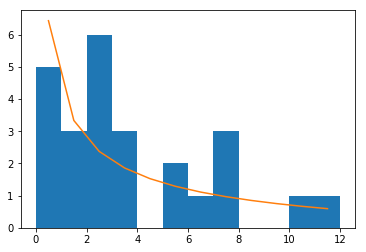

In [7]:
hist = plt.hist([om.in_degree(n) for n in om.nodes],bins=[i for i in range(13)])
xdata = [(l + r)/2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

reg = linregress(np.log(xdata), np.log(ydata))

plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

plt.show()

## hub e Authority do two-mode

In [8]:
estilos = ['Samba', 'MPB', 'Rap Nacional', 'Pop', 'K-Pop', 'Metal', 'Indie Rock', 'Funk', 'Sertanejo', 
           'Eletronica', 'Pop Rock', 'Disco', 'Opera', 'Pagode', 'Rock classico', 'Jazz', 'J-Pop']

pessoas = ['Isa', 'Chen', 'Ale', 'Rapha', 'Paulo', "Elisa", 'Pedro', "Antonio", 'Forba', 'Hugo', 'Vitoria',
          'Fred', 'Rachel', 'Toyama', 'Sabrina', 'Gabs', 'Bruna', 'Martim', 'Joao', 'Jean', 'Carlos', 'Leo',
          'Graicer']

nodes_estilo = []
nodes_pessoas = []

#acha os nós com estilo
for n in tm.nodes:
    if tm.nodes[n]["label"] in estilos:
        nodes_estilo.append(n)

#acha os nós com pessoas
for n in tm.nodes:
    if tm.nodes[n]["label"] in pessoas:
        nodes_pessoas.append(n)
        
#faz tabela com o in degree dos estilos
indegree_tm =[]
for n in tm.nodes:
    if n in nodes_estilo:
        indegree_tm.append(tm.in_degree(n))

In [9]:
def outdegree_p(list_nodes):
    outdegree_pond =[]
    for n in list_nodes:
        if n in nodes_pessoas:
            a =[s for s in tm.successors(n)]
            outdegree_pond.append([list_nodes[n]["label"], tm.out_degree(n), a])
    return outdegree_pond

In [10]:
#calculo do out degree ponderado
outdegree_pond = outdegree_p(tm.nodes)
outdegree_pond

[['Isa', 7, [0, 31, 25, 5, 26, 24, 19]],
 ['Chen', 6, [15, 36, 17, 32, 24, 4]],
 ['Ale', 6, [17, 28, 24, 32, 36, 3]],
 ['Rapha', 5, [19, 4, 22, 31, 24]],
 ['Paulo', 3, [15, 32, 25]],
 ['Elisa', 2, [25, 5]],
 ['Pedro', 5, [17, 26, 25, 32, 24]],
 ['Antonio', 5, [22, 5, 19, 28, 36]],
 ['Forba', 15, [37, 36, 14, 22, 4, 25, 26, 5, 3, 15, 0, 24, 31, 17, 32]],
 ['Hugo', 7, [3, 5, 19, 24, 31, 22, 26]],
 ['Vitoria', 7, [24, 32, 17, 15, 5, 3, 25]],
 ['Fred', 7, [3, 26, 24, 36, 37, 0, 31]],
 ['Rachel', 7, [31, 25, 24, 5, 22, 19, 4]],
 ['Toyama', 8, [25, 24, 17, 4, 15, 31, 32, 37]],
 ['Sabrina', 10, [26, 5, 14, 25, 37, 32, 22, 19, 17, 24]],
 ['Gabs', 5, [19, 24, 4, 31, 22]],
 ['Bruna', 4, [4, 37, 15, 24]],
 ['Martim', 5, [24, 19, 25, 4, 5]],
 ['Joao', 6, [22, 31, 32, 4, 19, 24]],
 ['Jean', 10, [32, 15, 25, 5, 37, 24, 26, 3, 36, 17]],
 ['Carlos', 2, [24, 5]],
 ['Leo', 1, [37]],
 ['Graicer', 6, [4, 3, 26, 32, 24, 31]]]

In [11]:
def indegree_p(list_nodes):
    indegree_pond_fake = [[i, 0] for i in range(len(tm.nodes))]
    indegree_pond = []
    
    for n in list_nodes:
        for estilo in n[2]:
            indegree_pond_fake[estilo][1]+=1

    for e in indegree_pond_fake:
        if tm.nodes[e[0]]["label"] in estilos:
            indegree_pond.append([e[0], e[1]])   

    soma = 0

    for f in indegree_pond:
        soma+=f[1]


    for g in indegree_pond:
        g[1] /= soma

    
    return indegree_pond

In [12]:
est_ind_pond = indegree_p(outdegree_pond)
est_ind_pond

[[0, 0.02158273381294964],
 [3, 0.050359712230215826],
 [4, 0.07194244604316546],
 [5, 0.07913669064748201],
 [14, 0.014388489208633094],
 [15, 0.050359712230215826],
 [17, 0.05755395683453238],
 [19, 0.06474820143884892],
 [22, 0.05755395683453238],
 [24, 0.1366906474820144],
 [25, 0.07913669064748201],
 [26, 0.05755395683453238],
 [28, 0.014388489208633094],
 [31, 0.07194244604316546],
 [32, 0.07913669064748201],
 [36, 0.04316546762589928],
 [37, 0.050359712230215826]]

In [13]:
def norm_outdegree(est_ind_pond_f):
    list_norm_outpond = []
    for n in outdegree_pond:
        soma = 0
        for estilo in n[2]:
            for i in est_ind_pond_f:
                if estilo == i[0]:
                    soma+=i[1]
        list_norm_outpond.append([n[0], soma, n[2]])
    return list_norm_outpond

In [14]:
p_outd_pond = norm_outdegree(est_ind_pond)
p_outd_pond

[['Isa', 0.5107913669064749, [0, 31, 25, 5, 26, 24, 19]],
 ['Chen', 0.4388489208633094, [15, 36, 17, 32, 24, 4]],
 ['Ale', 0.381294964028777, [17, 28, 24, 32, 36, 3]],
 ['Rapha', 0.40287769784172667, [19, 4, 22, 31, 24]],
 ['Paulo', 0.20863309352517984, [15, 32, 25]],
 ['Elisa', 0.15827338129496402, [25, 5]],
 ['Pedro', 0.41007194244604317, [17, 26, 25, 32, 24]],
 ['Antonio', 0.2589928057553956, [22, 5, 19, 28, 36]],
 ['Forba',
  0.9208633093525179,
  [37, 36, 14, 22, 4, 25, 26, 5, 3, 15, 0, 24, 31, 17, 32]],
 ['Hugo', 0.5179856115107914, [3, 5, 19, 24, 31, 22, 26]],
 ['Vitoria', 0.5323741007194245, [24, 32, 17, 15, 5, 3, 25]],
 ['Fred', 0.4316546762589928, [3, 26, 24, 36, 37, 0, 31]],
 ['Rachel', 0.5611510791366907, [31, 25, 24, 5, 22, 19, 4]],
 ['Toyama', 0.5971223021582733, [25, 24, 17, 4, 15, 31, 32, 37]],
 ['Sabrina', 0.6762589928057554, [26, 5, 14, 25, 37, 32, 22, 19, 17, 24]],
 ['Gabs', 0.40287769784172667, [19, 24, 4, 31, 22]],
 ['Bruna', 0.3093525179856115, [4, 37, 15, 24]],
 

In [15]:
def dist_euclidian (antiga_out, antiga_in, nova_out, nova_in):
    ds =[]
    for i in range(len(antiga_out)):
        out_dist = math.sqrt((antiga_out[i][1] - nova_out[i][1])**2)
        ds.append(out_dist)
    
    for i in range(len(antiga_in)):
        in_dist = math.sqrt((antiga_in[i][1] - nova_in[i][1])**2)    
        ds.append(in_dist)
    return max(ds)

In [16]:
d = float('inf')
limite = 10E-90
itera = 0
while(d > limite):
    nova_in_pond = indegree_p(p_outd_pond)
    nova_out_pond = norm_outdegree(nova_in_pond)
    
    d = dist_euclidian(p_outd_pond,est_ind_pond, nova_out_pond, nova_in_pond)
    
    p_outd_pond = nova_out_pond[:]
    est_ind_pond = nova_in_pond[:]
    
    itera+=1

In [17]:
genero_top = sorted(nova_in_pond, key=lambda x: x[1], reverse=True)
genero_top

[[24, 0.1366906474820144],
 [5, 0.07913669064748201],
 [25, 0.07913669064748201],
 [32, 0.07913669064748201],
 [4, 0.07194244604316546],
 [31, 0.07194244604316546],
 [19, 0.06474820143884892],
 [17, 0.05755395683453238],
 [22, 0.05755395683453238],
 [26, 0.05755395683453238],
 [3, 0.050359712230215826],
 [15, 0.050359712230215826],
 [37, 0.050359712230215826],
 [36, 0.04316546762589928],
 [0, 0.02158273381294964],
 [14, 0.014388489208633094],
 [28, 0.014388489208633094]]

In [18]:
tm.nodes[genero_top[0][0]]['label']

'Eletronica'

In [19]:
dj_top = sorted(nova_out_pond, key=lambda x: x[1], reverse=True)
dj_top

[['Forba',
  0.9208633093525179,
  [37, 36, 14, 22, 4, 25, 26, 5, 3, 15, 0, 24, 31, 17, 32]],
 ['Jean', 0.6834532374100719, [32, 15, 25, 5, 37, 24, 26, 3, 36, 17]],
 ['Sabrina', 0.6762589928057554, [26, 5, 14, 25, 37, 32, 22, 19, 17, 24]],
 ['Toyama', 0.5971223021582733, [25, 24, 17, 4, 15, 31, 32, 37]],
 ['Rachel', 0.5611510791366907, [31, 25, 24, 5, 22, 19, 4]],
 ['Vitoria', 0.5323741007194245, [24, 32, 17, 15, 5, 3, 25]],
 ['Hugo', 0.5179856115107914, [3, 5, 19, 24, 31, 22, 26]],
 ['Isa', 0.5107913669064749, [0, 31, 25, 5, 26, 24, 19]],
 ['Joao', 0.48201438848920863, [22, 31, 32, 4, 19, 24]],
 ['Graicer', 0.4676258992805755, [4, 3, 26, 32, 24, 31]],
 ['Chen', 0.4388489208633094, [15, 36, 17, 32, 24, 4]],
 ['Martim', 0.43165467625899284, [24, 19, 25, 4, 5]],
 ['Fred', 0.4316546762589928, [3, 26, 24, 36, 37, 0, 31]],
 ['Pedro', 0.41007194244604317, [17, 26, 25, 32, 24]],
 ['Rapha', 0.40287769784172667, [19, 4, 22, 31, 24]],
 ['Gabs', 0.40287769784172667, [19, 24, 4, 31, 22]],
 ['Ale',

In [20]:
dj_top[0][0]

'Forba'

## Terceira métrica

In [21]:
cc = nx.closeness_centrality(om)

In [22]:
bc = nx.betweenness_centrality(om)

In [27]:


data = pd.DataFrame({
    'aluno': [om.nodes[n]['label'] for n in om.nodes],
    'closeness': [cc[n] for n in om.nodes],
    'betweenness': [bc[n] for n in om.nodes],
})

data.sort_values(by=['closeness'])

,aluno,closeness,betweenness
24,Tirta,0.000000,0.000000
21,Pedro,0.000000,0.000000
4,Joao,0.000000,0.000000
6,Carlos,0.000000,0.000000
17,Ale,0.000000,0.000000
13,Paulo,0.000000,0.000000
1,Jean,0.041667,0.002536
19,Antonio,0.175362,0.038043
3,Leo,0.176901,0.005435
12,Elisa,0.177755,0.000000


In [28]:
data.sort_values(by=['betweenness'])

,aluno,closeness,betweenness
12,Elisa,0.177755,0.000000
21,Pedro,0.000000,0.000000
17,Ale,0.000000,0.000000
16,Rios,0.314881,0.000000
13,Paulo,0.000000,0.000000
6,Carlos,0.000000,0.000000
24,Tirta,0.000000,0.000000
4,Joao,0.000000,0.000000
1,Jean,0.041667,0.002536
3,Leo,0.176901,0.005435


In [30]:
a = data.closeness
lista_data = []

for i in range(len(a)):
    if data.aluno[i] == 'Tirta' or data.aluno[i] == 'Rios':
        pass
    else:
        lista_data.append(data.closeness[i])

        

In [31]:
hub_pos = [ i for i in range(len(dj_top))]


In [32]:
betweenness= []

for i in range(len(a)):
    if data.aluno[i] == 'Tirta' or data.aluno[i] == 'Rios':
        pass
    else:
        betweenness.append(data.betweenness[i])

In [33]:
def cost(c, A):
    row = np.matrix(c)

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

In [34]:
write_coreness(om)


In [35]:
l1_c = ( [om.nodes[n]['coreness'] for n in om.nodes] )


core= []

for i in range(len(l1_c)):
    if om.nodes[i]['label'] == 'Tirta' or om.nodes[i]['label'] == 'Rios':
        pass
    else:
        core.append(l1_c[i])

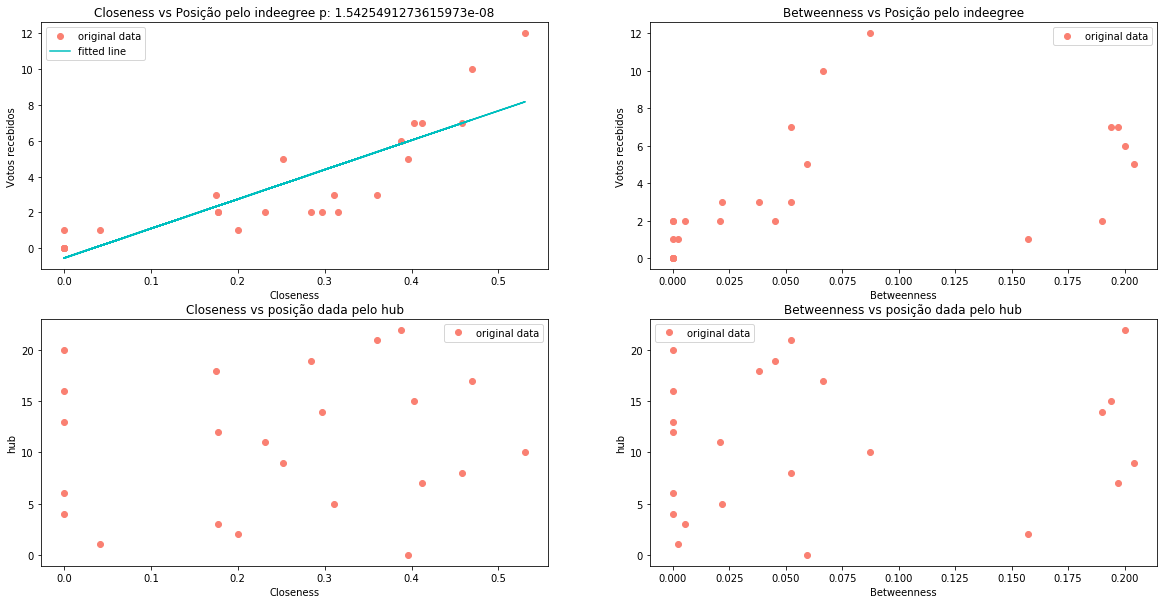

In [36]:
x = data.closeness
x1 = data.betweenness
y = [om.in_degree(n) for n in om.nodes]

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(x, y, 'o', color='salmon', label='original data')
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.plot(x, intercept + slope*x, 'c', label='fitted line')
plt.title("Closeness vs Posição pelo indeegree p: {}".format(p_value))
plt.xlabel("Closeness")
plt.ylabel("Votos recebidos")
plt.legend()

plt.subplot(222)
plt.plot(x1, y, 'o', color='salmon', label='original data')
plt.title("Betweenness vs Posição pelo indeegree")
plt.xlabel("Betweenness")
plt.ylabel("Votos recebidos")
plt.legend()

plt.subplot(223)
plt.plot(lista_data, hub_pos, 'o', color='salmon', label='original data')
plt.title("Closeness vs posição dada pelo hub")
plt.xlabel("Closeness")
plt.ylabel("hub")
plt.legend()

plt.subplot(224)
plt.plot(betweenness, hub_pos, 'o', color='salmon', label='original data')
plt.title("Betweenness vs posição dada pelo hub")
plt.xlabel("Betweenness")
plt.ylabel("hub")
plt.legend()

plt.show()

In [37]:
corr1, p = pearsonr(data.closeness, y)
print("Closeness vs Posição pelo indeegree, corr e p:", corr1, p)

corr2, p = pearsonr(x1, y)
print("Betweenness vs Posição pelo indeegree, corr e p:", corr2, p)

corr3, p = pearsonr(lista_data, hub_pos)
print("Closeness vs posição dada pelo hub, corr e p:", corr3, p)

corr4, p = pearsonr(betweenness, hub_pos)
print("Betweenness vs posição dada pelo hub, corr e p:", corr4, p)

Closeness vs Posição pelo indeegree, corr e p: 0.8705430748589491 1.542549127361605e-08
Betweenness vs Posição pelo indeegree, corr e p: 0.5069476183481849 0.0097008258800755
Closeness vs posição dada pelo hub, corr e p: 0.11541697149396411 0.5999930214390359
Betweenness vs posição dada pelo hub, corr e p: 0.11946061636116023 0.5871888452902279


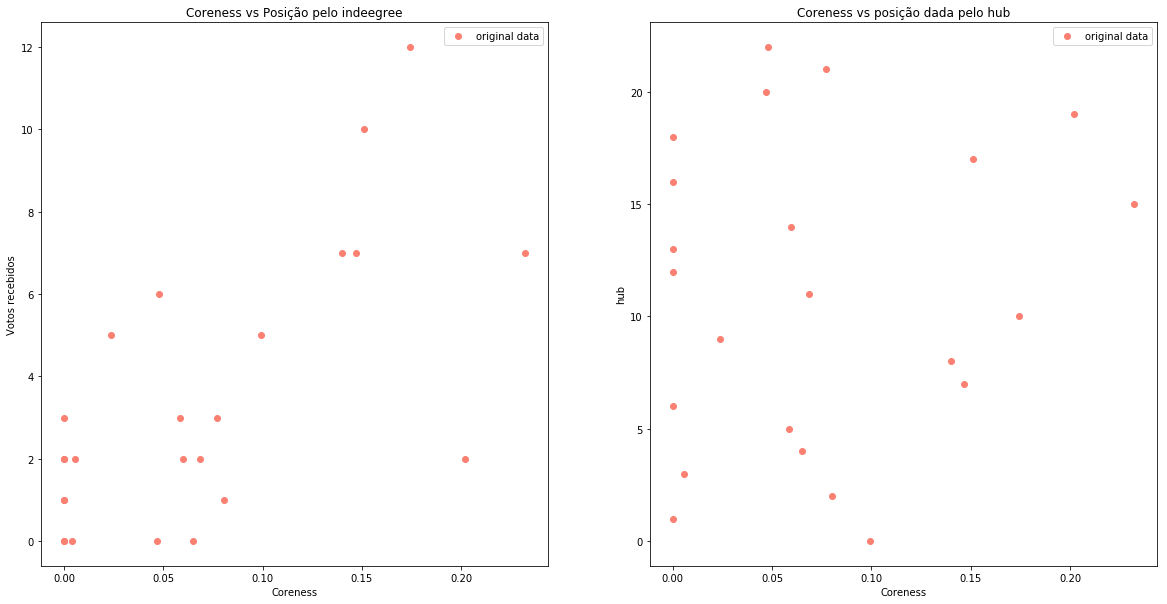

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(l1_c, y, 'o', color='salmon', label='original data')

plt.title("Coreness vs Posição pelo indeegree")
plt.xlabel("Coreness")
plt.ylabel("Votos recebidos")
plt.legend()

plt.subplot(122)
plt.plot(core, hub_pos, 'o', color='salmon', label='original data')
plt.title("Coreness vs posição dada pelo hub")
plt.xlabel("Coreness")
plt.ylabel("hub")
plt.legend()

In [261]:
corr5, p = pearsonr(l1_c, y)
print("Coreness vs Posição pelo indeegree, corr e p:", corr5, p)

corr6, p = pearsonr(core, hub_pos)
print("Coreness vs posição dada pelo hub, corr e p:", corr6, p)

Coreness vs Posição pelo indeegree, corr e p: 0.6723501945243944 0.00023181102311048968
Coreness vs posição dada pelo hub, corr e p: 0.13777581803877398 0.530722846471787


## Conclusão

Como terceira métrica foi utilizado uma comparação entre closeness e os votos que cada aluno recebeu. Neste caso nosso hipótese era que quem possui um closeness maior é melhor para ser o DJ. Para decidir quem é a melhor opção para ser o DJ, foram utilizadas duas métricas, a primeira é que quem recebe mais votos é a o mais apto, a segunda é quem possui maior hub é o mais preparado. Dessa forma, foram feitas dois gráficos de dispersão para analisar se havia uma tendência entre closeness e as métricas acima. Para o primeiro caso, quem recebe mais votos, o gráfico de dispersão mostrou que realmente quem possuia maior quantidade de votos tinha um closeness mais alto. Por outro lado quando analisado o hub, não hove correlação nenhuma dos dados.

Assim, além do closeness, foram feitos a dispersão para betweenness e coreness. No caso de betweenness nenhuma da métricas mostrou relação. Já para o coreness a correlação com a quatidade votos também se mostrou alta.